# Exp3 Data Analysis

author: Tingying He date: 20230325

## Input data:
1. Exp3 results download from our server (.csv)
    * measurements.csv
        * education
        * readability score
        * BeauVis score
    * individual_texture: measurements of trials per participant (participant_id.csv), each trial is one row
        * accuracy
        * response time
    
2. Exp3 demographic data exported from Prolific (.csv)
    * gender
    * age

## Output

### Basic infomation
1. Valid responses of Exp3 (a .csv file without Prolific ID)
2. Number of participants in each condition (bar/pie)
3. Demographics (gender, age, highest education)

### Data analysis

#### Accuracy
1. Percentage of accuracy for each texture in each condition
2. Average accuracy with 95% CI for each texture in each condition
3. pair-wise comparison of two different texture in each condition

#### Response time
1. Average accuracy with 95% CI for each texture in each condition
2. pair-wise comparison of two different texture in each condition

#### Readability
1. Score of readability with 95% CI

In [399]:
# import lib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import math
import os
import glob # read csv files

# Basic information

## Import data

In [400]:
# import data from LimeSurvey
df=pd.read_csv("final_data/measurements.csv")
df.head()

,participant_id,study_id,session_id,condition,is_debug,exclude_reloaders,timestamp_0,browser_name,browser_version,os,...,beauvis3_bar_icon,beauvis4_bar_icon,readable_pie_icon,beauvis0_pie_icon,beauvis1_pie_icon,beauvis2_pie_icon,beauvis3_pie_icon,beauvis4_pie_icon,timestamp_98,optionalComments
0,5fb65ad58d6ec70008c4ee34,641f4f507c8086c2b12966b8,641f500950a46280aa19f017,bar,False,1,1679773711081,Chrome,111.0.0.0,Windows,...,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1679774282918,NaN
1,60ce30df032ca7cfb03900bc,641f4f507c8086c2b12966b9,641f4fd2e1622d07fec05566,pie,False,1,1679773742913,Chrome,111.0.0.0,Windows,...,NaN,NaN,6.0,6.0,6.0,5.0,5.0,6.0,1679774929743,NaN
2,615f04836985bb3ce5815f3c,641f4f507c8086c2b12966b9,641f500f09e06ae2bcac7171,pie,False,1,1679773925640,Chrome,111.0.0.0,Windows,...,NaN,NaN,4.0,7.0,7.0,7.0,7.0,7.0,1679775043993,Everything went well and I enjoyed the study a...
3,5fca888982a09a6a47620777,641f4f507c8086c2b12966b8,641f5048b37c6fb7641a3b7b,pie,False,1,1679773787086,Chrome,111.0.0.0,Windows,...,NaN,NaN,6.0,6.0,6.0,6.0,7.0,6.0,1679775987213,NaN
4,5f6e5f1a89a12b394d694868,641f4f507c8086c2b12966b9,641f5a718d356fa41d9aeaa7,pie,False,1,1679776376504,Chrome,111.0.0.0,macOS,...,NaN,NaN,3.0,5.0,6.0,6.0,5.0,6.0,1679776964033,NaN


In [401]:
# import data from Prolific
df_p=pd.read_csv("final_data/prolific_export_641f4d6c66bf43f77dc91ce4.csv")
df_p.head()

,Submission id,Participant id,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,Total approvals,Fluent languages,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
0,641f4fd2e1622d07fec05566,60ce30df032ca7cfb03900bc,AWAITING REVIEW,2023-03-25T19:48:46.811000Z,2023-03-25T20:09:03.830000Z,NaN,2023-03-25T20:09:04.289051Z,1218,CDR2RKQG,43,English,25,Female,Black,South Africa,Hungary,South Africa,English,Yes,Part-Time
1,641f500950a46280aa19f017,5fb65ad58d6ec70008c4ee34,AWAITING REVIEW,2023-03-25T19:48:27.145000Z,2023-03-25T19:58:09.564000Z,NaN,2023-03-25T19:58:10.195660Z,583,CDR2RKQG,124,"English, Portuguese",20,Male,White,Portugal,Portugal,Portugal,Portuguese,Yes,Unemployed (and job seeking)
2,641f500f09e06ae2bcac7171,615f04836985bb3ce5815f3c,AWAITING REVIEW,2023-03-25T19:51:36.509000Z,2023-03-25T20:12:28.797000Z,NaN,2023-03-25T20:12:29.298077Z,1253,CDR2RKQG,108,"Afrikaans, English",32,Female,Black,South Africa,South Africa,South Africa,English,DATA_EXPIRED,DATA_EXPIRED
3,641f5048b37c6fb7641a3b7b,5fca888982a09a6a47620777,AWAITING REVIEW,2023-03-25T19:49:28.482000Z,2023-03-25T20:26:42.445000Z,NaN,2023-03-25T20:26:43.105111Z,2234,CDR2RKQG,241,"Spanish, English",29,Male,Mixed,Mexico,Mexico,Mexico,Spanish,Yes,Unemployed (and job seeking)
4,641f5a4346c497b1deff68bb,5e569011c0486f03a51801b5,AWAITING REVIEW,2023-03-25T20:32:03.666000Z,2023-03-25T20:44:22.791000Z,NaN,2023-03-25T20:44:23.147554Z,740,CDR2RKQG,242,"English, Polish",21,Male,White,Poland,Poland,Poland,Polish,Yes,Other


In [402]:
# add demographics data from Prolific(df_p) to df by prolific id

# columns we want to get from Prolific
df['gender'] = ''
df['age'] = ''

# write these columns
for index, row in df.iterrows():
    for index_p, row_p in df_p.iterrows():
        if row['participant_id'] == row_p['Participant id']:
            df.loc[index, 'gender'] = row_p['Sex']
            df.loc[index, 'age'] = row_p['Age']

In [403]:
# check condition balance
df['condition'].value_counts()

pie    83
bar    67
Name: condition, dtype: int64

## Select valid data

In [404]:
df.to_csv('generated_csv/exp3_valid_responses.csv', index=False)

In [405]:
# drop the 'Prolific Id' column
df_no_PID = df.drop('participant_id', axis=1)
df_no_PID.to_csv('generated_csv/exp3_valid_responses_without_prolificID.csv', index=False)

## Demographics

In [406]:
def printDemographics(df):
    #gender
    male_count = len(df[df['gender'] == 'Male'])
    female_count = len(df[df['gender'] == 'Female'])
    other_count = len(df[(df['gender'] != 'Male') & (df['gender'] != 'Female')])
    print("Gender")
    print("male:", male_count)
    print("female:", female_count)
    print("other(please check):", other_count)
    print()
    
    # age
    print("Age")
    print("mean:", np.mean(df['age']))
    print("sd:", df['age'].std())
    print()
    

    bachelor_count = len(df[df['education'] == 'bachelor'])
    master_count = len(df[df['education'] == 'master'])
    phd_count = len(df[df['education'] == 'phd'])
    other_count = len(df[(df['education'] != 'bachelor') & (df['education'] != 'master') & (df['education'] != 'phd')])

    print("Eductaion")
    print("bachelor:", bachelor_count)
    print("master:", master_count)
    print("phd:", phd_count)
    print("other:", other_count)
    print()

In [407]:
printDemographics(df)

Gender
male: 76
female: 74
other(please check): 0

Age
mean: 27.966666666666665
sd: 8.062188377343173

Eductaion
bachelor: 99
master: 23
phd: 1
other: 27



In [408]:
printDemographics(df[df['condition'] == 'bar'])

Gender
male: 39
female: 28
other(please check): 0

Age
mean: 27.865671641791046
sd: 8.112645427352362

Eductaion
bachelor: 48
master: 12
phd: 1
other: 6



In [409]:
len(df[df['condition'] == 'bar'])

67

In [410]:
len(df[df['condition'] == 'pie'])

83

In [411]:
printDemographics(df[df['condition'] == 'pie'])

Gender
male: 37
female: 46
other(please check): 0

Age
mean: 28.048192771084338
sd: 8.069671638463987

Eductaion
bachelor: 51
master: 11
phd: 0
other: 21



# Data analysis

In [412]:
# functions for plotCIs

# prepare data
def createNumberList(df, columnName):
    """
    create a list of numbers from a df column, remove all nan in this column
    """
    numberList = [x for x in df[columnName].tolist() if not math.isnan(x)]
    
    return numberList


def bootstrap_ci(data, stat_function, n_bootstraps=1000, ci=95):
    """
    Calculate the confidence interval using bootstrap.
    :param data: The original data sample as a list or numpy array
    :param stat_function: The function to compute the statistic of interest
    :param n_bootstraps: The number of bootstrap samples to generate (default: 1000)
    :param ci: The confidence level in percent (default: 95)
    :return: A tuple with the lower and upper bounds of the confidence interval
    """
    # Convert data to a numpy array if it's not already
    data = np.asarray(data)
    
    # Generate bootstrap samples
    bootstrap_samples = np.random.choice(data, (n_bootstraps, len(data)), replace=True)
    
    # Calculate the statistic for each bootstrap sample
    bootstrap_stats = np.apply_along_axis(stat_function, 1, bootstrap_samples)
    
    # Calculate the lower and upper bounds of the confidence interval
    lower_bound = np.percentile(bootstrap_stats, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrap_stats, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

# Example usage:
# data = readable_list
# ci_lower, ci_upper = bootstrap_ci(data, np.mean)

# print(f"The 95% confidence interval for the mean is: ({ci_lower:.2f}, {ci_upper:.2f})")
def plotCIs(data_list, 
            x_axis_min, 
            x_axis_max, 
            fig_width, 
            fig_height, 
            fig_file_name,
            gray_line_interval = 1):
    # Create the graph with the specified width and height (in inch)
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    
    # hide the border of the figure
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Extract the data from the dictionaries and calculate means and CIs
    means_and_cis = [(np.mean(data_dict[label]), *bootstrap_ci(data_dict[label], np.mean)) for data_dict in data_list for label in data_dict]

    # Plot the CIs and means for each data set
    for i, (mean, ci_lower, ci_upper) in enumerate(means_and_cis, start=1):
        ax.hlines(y=i, xmin=ci_lower, xmax=ci_upper, color='black')
        ax.plot(mean, i, 'ko')
        ax.text(x_axis_max+0.25, 
                i, 
                f"{mean:.2f} [{ci_lower:.2f}, {ci_upper:.2f}]",
                horizontalalignment='left', 
                verticalalignment='center', 
                fontsize=8)
        
    # Plot the light grey vertical lines
    for x_value in range(x_axis_min, x_axis_max+1, gray_line_interval):
        ax.axvline(x_value, color='lightgrey', linewidth=0.5, zorder=0)
        
    # Set the y-axis labels to the names of the data sets
    y_labels = [list(d.keys())[0] for d in data_list]
    ax.set_yticks(range(1, len(data_list) + 1))
    ax.set_yticklabels(y_labels)

    # Set the x-axis limits
    ax.set_xlim(x_axis_min, x_axis_max+0.5)

    fig.savefig(fig_file_name+".pdf", format="pdf", bbox_inches="tight")

#     

In [413]:
def plotCIs_bonferroni_correction(data_list, 
            x_axis_min, 
            x_axis_max, 
            fig_width, 
            fig_height, 
            fig_file_name,
            gray_line_interval=1,
            alpha=0.05):
    # Create the graph with the specified width and height (in inch)
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    
    # hide the border of the figure
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Extract the data from the dictionaries and calculate means and CIs
    means_and_cis = [(np.mean(data_dict[label]), *bootstrap_ci(data_dict[label], np.mean)) for data_dict in data_list for label in data_dict]

    # Plot the CIs and means for each data set
    for i, (mean, ci_lower, ci_upper) in enumerate(means_and_cis, start=1):
        ax.hlines(y=i, xmin=ci_lower, xmax=ci_upper, color='black')
        ax.plot(mean, i, 'ko')
        ax.text(x_axis_max+0.25, 
                i, 
                f"{mean:.2f} [{ci_lower:.2f}, {ci_upper:.2f}]",
                horizontalalignment='left', 
                verticalalignment='center', 
                fontsize=8)
    
        
    # Plot the Bonferroni-corrected CIs for each data set in thin red lines
    for i, (mean, ci_lower, ci_upper) in enumerate(means_and_cis, start=1):
        n_comparisons = 3
        alpha_adj = alpha / n_comparisons  # adjusted significance level for Bonferroni correction
        bonf_lower = mean - np.sqrt((ci_upper - mean)**2 / n_comparisons) * np.sqrt(1 / (2*n_comparisons*alpha_adj))
        bonf_upper = mean + np.sqrt((mean - ci_lower)**2 / n_comparisons) * np.sqrt(1 / (2*n_comparisons*alpha_adj))
        ax.hlines(y=i, xmin=bonf_lower, xmax=bonf_upper, color='red', linewidth=0.5)
        
    # Plot the light grey vertical lines
    for x_value in range(x_axis_min, x_axis_max+1, gray_line_interval):
        ax.axvline(x_value, color='lightgrey', linewidth=0.5, zorder=0)
        
    # Set the y-axis labels to the names of the data sets
    y_labels = [list(d.keys())[0] for d in data_list]
    ax.set_yticks(range(1, len(data_list) + 1))
    ax.set_yticklabels(y_labels)

    # Set the x-axis limits
    ax.set_xlim(x_axis_min, x_axis_max+0.5)

    fig.savefig(fig_file_name+".pdf", format="pdf", bbox_inches="tight")

In [414]:
def create_data_list_for_plotCIs (df, 
                                  theme, 
                                  condition1, 
                                  condition2, 
                                  condition3,
                                  label1, 
                                  label2, 
                                  label3):
    data_list = [
        {label1: createNumberList(df, f"{theme}_{condition1}")},
        {label2: createNumberList(df, f"{theme}_{condition2}")},
        {label3: createNumberList(df, f"{theme}_{condition3}")}
    ]
    
    return data_list


In [415]:
def writeDifferenceTwoConditions(df, compare_theme, condition1, condition2):
    """
    calculate difference (condition1 - condition2) of two conditions per participants (row), 
    and write it into a column in df ({compare_theme}_compare_{condition1}_{condition2})
    """
    for index, row in df.iterrows():
        difference = row[f"{compare_theme}_{condition1}"] - row[f"{compare_theme}_{condition2}"] 
        
        # update the value of df (the original dataframe)
        df.loc[index, f"{compare_theme}_compare_{condition1}_{condition2}"] = difference

In [416]:
def plotComparisonCIs (df, 
                       compare_theme, 
                       condition1, 
                       condition2, 
                       condition3, 
                       label21, 
                       label31, 
                       label32, 
                       x_axis_min, 
                       x_axis_max,
                       fig_width, 
                       fig_height, 
                       fig_file_name,
                       gray_line_interval = 1):
    writeDifferenceTwoConditions(df, compare_theme, condition2, condition1)
    writeDifferenceTwoConditions(df, compare_theme, condition3, condition1)
    writeDifferenceTwoConditions(df, compare_theme, condition3, condition2)
    
    data_list = [
        {label21: createNumberList(df, f"{compare_theme}_compare_{condition2}_{condition1}")},
        {label31: createNumberList(df, f"{compare_theme}_compare_{condition3}_{condition1}")},
        {label32: createNumberList(df, f"{compare_theme}_compare_{condition3}_{condition2}")},
    ]
    
    plotCIs_bonferroni_correction(data_list, x_axis_min, x_axis_max, fig_width, fig_height, fig_file_name)

### Readable

In [417]:
readable_bar_list = create_data_list_for_plotCIs (df, 
                                  'readable', 
                                  'bar_geo', 
                                  'bar_icon', 
                                  'bar_color',
                                  'geometric bar', 
                                  'iconic bar', 
                                  'gray bar')

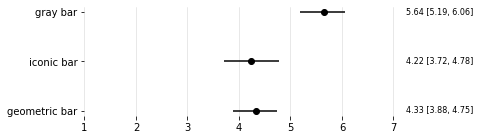

In [418]:
plotCIs(readable_bar_list, 1, 7, 6, 2, "generated_plots/readable_bar_CIs")

In [419]:
readable_pie_list = create_data_list_for_plotCIs (df, 
                                  'readable', 
                                  'pie_geo', 
                                  'pie_icon', 
                                  'pie_color',
                                  'geometric pie', 
                                  'iconic pie', 
                                  'gray pie')

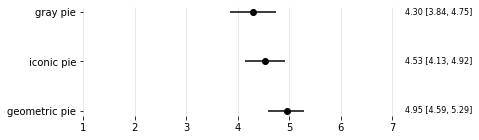

In [420]:
plotCIs(readable_pie_list, 1, 7, 6, 2, "generated_plots/readable_pie_CIs")

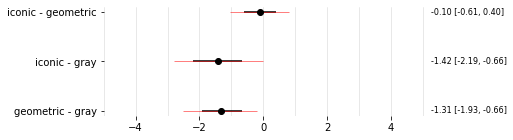

In [421]:
plotComparisonCIs (df, 
                   'readable', 
                   'bar_color', 
                   'bar_geo', 
                   'bar_icon', 
                   'geometric - gray', 
                   'iconic - gray', 
                   'iconic - geometric', 
                   -5, 
                   5, 
                   6, 
                   2, 
                   "generated_plots/readable_compare_bar_CIs")

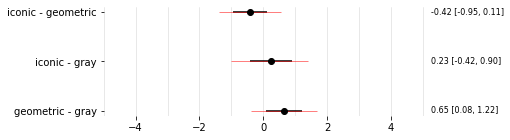

In [422]:
plotComparisonCIs (df, 
                   'readable', 
                   'pie_color', 
                   'pie_geo', 
                   'pie_icon', 
                   'geometric - gray', 
                   'iconic - gray', 
                   'iconic - geometric', 
                   -5, 
                   5, 
                   6, 
                   2, 
                   "generated_plots/readable_compare_pie_CIs")

### Aesthetic

In [423]:
# aesthetics
def writeBeauvisScore(df, condition):
    """
    calculate average score of 5 items in the BeauVis scale per participants (row), 
    and write it into a column in df (beauvis_{condition})
    """
    df[f"beauvis_{condition}"] = ""
    for index, row in df.iterrows():
        beauvis_score = np.mean(row[[f"beauvis0_{condition}", 
                                     f"beauvis1_{condition}",
                                     f"beauvis2_{condition}",
                                     f"beauvis3_{condition}",
                                     f"beauvis4_{condition}"
                                    ]])
        # update the value of df (the original dataframe)
        df.loc[index, f"beauvis_{condition}"] = beauvis_score

In [424]:
writeBeauvisScore(df, 'bar_geo')
writeBeauvisScore(df, 'bar_icon')
writeBeauvisScore(df, 'bar_color')
writeBeauvisScore(df, 'pie_geo')
writeBeauvisScore(df, 'pie_icon')
writeBeauvisScore(df, 'pie_color')

In [425]:
df_beauvis = df.loc[:, ['participant_id',
                        'beauvis_bar_geo',
                        'beauvis_bar_icon',
                        'beauvis_bar_color',
                        'beauvis_pie_geo',
                        'beauvis_pie_icon',
                        'beauvis_pie_color',]]
df_beauvis.to_csv('generated_csv/beauvis.csv', index=False)

In [426]:
df_readable = df.loc[:, ['participant_id',
                        'readable_bar_geo',
                        'readable_bar_icon',
                        'readable_bar_color',
                        'readable_pie_geo',
                        'readable_pie_icon',
                        'readable_pie_color',]]
df_readable.to_csv('generated_csv/readable.csv', index=False)

In [427]:
beauvis_bar_list = create_data_list_for_plotCIs (df, 
                                  'beauvis', 
                                  'bar_geo', 
                                  'bar_icon', 
                                  'bar_color',
                                  'geometric bar', 
                                  'iconic bar', 
                                  'gray bar')

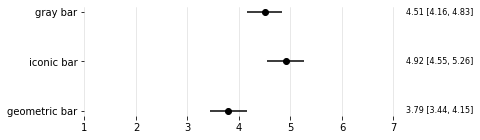

In [428]:
plotCIs(beauvis_bar_list, 1, 7, 6, 2, "generated_plots/beauvis_bar_CIs")

In [429]:
beauvis_pie_list = create_data_list_for_plotCIs (df, 
                                  'beauvis', 
                                  'pie_geo', 
                                  'pie_icon', 
                                  'pie_color',
                                  'geometric pie', 
                                  'iconic pie', 
                                  'gray pie')

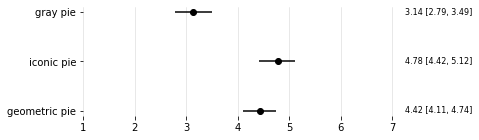

In [430]:
plotCIs(beauvis_pie_list, 1, 7, 6, 2, "generated_plots/beauvis_pie_CIs")

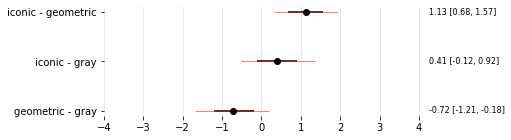

In [431]:
plotComparisonCIs (df, 
                   'beauvis', 
                   'bar_color', 
                   'bar_geo', 
                   'bar_icon', 
                   'geometric - gray', 
                   'iconic - gray', 
                   'iconic - geometric', 
                   -4, 
                   4, 
                   6, 
                   2, 
                   "generated_plots/beauvis_compare_bar_CIs")

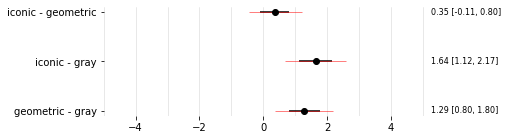

In [432]:
plotComparisonCIs (df, 
                   'beauvis', 
                   'pie_color', 
                   'pie_geo', 
                   'pie_icon', 
                   'geometric - gray', 
                   'iconic - gray', 
                   'iconic - geometric', 
                   -5, 
                   5, 
                   6, 
                   2, 
                   "generated_plots/beauvis_compare_pie_CIs")

## Accuracy
读取individual_texture文件夹里的所有csv，全部合并
例如，现在如果我们要分析bar_geo条件的accuracy，我们需要
1. 找出real
2. condition = bar
3. texture_condition = geo

In [433]:
#读file,算正确率
# Set the folder path
folder_path = 'individual_texture'

# Find all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Define error rate data frame
correct_rate_columns = ['participant_id', 
                        'correct_rate_bar_geo', 
                        'correct_rate_bar_icon', 
                        'correct_rate_bar_color', 
                        'correct_rate_pie_geo', 
                        'correct_rate_pie_icon', 
                        'correct_rate_pie_color']
df_correct_rate = pd.DataFrame(columns=correct_rate_columns)


# Define error rate data frame
response_time_columns = ['participant_id', 
                        'response_time_bar_geo', 
                        'response_time_bar_icon', 
                        'response_time_bar_color', 
                        'response_time_pie_geo', 
                        'response_time_pie_icon', 
                        'response_time_pie_color']
df_response_time = pd.DataFrame(columns=response_time_columns)

In [434]:
def get_correct_rate(df_file, texture_condition):
    df_file_filtered = df_file[(df_file['trial_type'] == 'real') &
             (df_file['texture_condition'] == texture_condition)]
    # Calculate the correct_rate in this condition per participant
    total_rows = len(df_file_filtered)
    correct_rows = len(df_file_filtered[df_file_filtered['answer_accuracy'] == 1])
    correct_rate = (correct_rows / total_rows) * 100
    
    
    # Append the new row with file_name and correct_rate
#     new_row = {'participant_id': participant_id, 
#                f"correct_rate_{condition}_{texture_condition}": correct_rate}
    
    return correct_rate

In [435]:
def get_response_time(df_file, texture_condition):
    df_file_filtered = df_file[(df_file['trial_type'] == 'real') &
             (df_file['texture_condition'] == texture_condition)&
             (df_file['answer_accuracy'] != -1)] # We exclude the time-out trials
    avg_response_time = df_file_filtered['elapsed_time'].mean()
    
    return avg_response_time

In [436]:
# Initialize an empty list to store individual DataFrames
dataframes = []

# Read and store each CSV file as a DataFrame, and check if the filename matches a participant_id
for file in csv_files:
    # Get the filename without extension
    file_name = os.path.splitext(os.path.basename(file))[0]

    
    # Check if the filename matches any value in the 'participant_id' column
    if file_name in df['participant_id'].values:
        # Read the CSV file and store it as a DataFrame
        df_file = pd.read_csv(file)
        
        # Add this participants' answer to df_correct_rate
        correct_rate_new_row = {"participant_id": file_name}
        df_correct_rate = df_correct_rate.append(correct_rate_new_row, ignore_index=True)
        
        correct_rate = get_correct_rate(df_file, 'geo')
        df_correct_rate.loc[df_correct_rate['participant_id'] == file_name, f"correct_rate_{df_file['condition'].iloc[0]}_geo"] = correct_rate
        
        correct_rate = get_correct_rate(df_file, 'icon')
        df_correct_rate.loc[df_correct_rate['participant_id'] == file_name, f"correct_rate_{df_file['condition'].iloc[0]}_icon"] = correct_rate
        
        correct_rate = get_correct_rate(df_file, 'color')
        df_correct_rate.loc[df_correct_rate['participant_id'] == file_name, f"correct_rate_{df_file['condition'].iloc[0]}_color"] = correct_rate
        
        # Add this participants' answer to df_correct_rate
        response_time_new_row = {"participant_id": file_name}
        df_response_time = df_response_time.append(response_time_new_row, ignore_index=True)
        
        response_time = get_response_time(df_file, 'geo')
        df_response_time.loc[df_response_time['participant_id'] == file_name, f"response_time_{df_file['condition'].iloc[0]}_geo"] = response_time
        
        response_time = get_response_time(df_file, 'icon')
        df_response_time.loc[df_response_time['participant_id'] == file_name, f"response_time_{df_file['condition'].iloc[0]}_icon"] = response_time
        
        response_time = get_response_time(df_file, 'color')
        df_response_time.loc[df_response_time['participant_id'] == file_name, f"response_time_{df_file['condition'].iloc[0]}_color"] = response_time
        
        
#         new_row = write_correct_rate_row(df_file, df_correct_rate, file_name, df_file['condition'].iloc[0], 'geo')
#         df_correct_rate = df_correct_rate.append(new_row, ignore_index=True)
        
#         new_row = write_correct_rate_row(df_file, df_correct_rate, file_name, df_file['condition'].iloc[0], 'icon')
#         df_correct_rate = df_correct_rate.append(new_row, ignore_index=True)
        
#         new_row = write_correct_rate_row(df_file, df_correct_rate, file_name, df_file['condition'].iloc[0], 'color')
#         df_correct_rate = df_correct_rate.append(new_row, ignore_index=True)
        # Check if the number of rows is equal to 78
        dataframes.append(df_file)
        if df_file.shape[0] != 78:
            # Print the filename if the number of rows is not equal to 78
            print(f"{file_name}.csv has {df_file.shape[0]} rows instead of 78")


# Concatenate all individual DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Check the combined DataFrame
# print(combined_df)

print(df_correct_rate)

combined_df.to_csv('generated_csv/combined.csv', index=False)

df_correct_rate.to_csv('generated_csv/correct_rate.csv', index=False)

df_response_time.to_csv('generated_csv/response_time.csv', index=False)

60e2ebb6ad1d5ee0e515a7c5.csv has 77 rows instead of 78
600f0f9c3bfcdc077c924e51.csv has 70 rows instead of 78
60ba46740472bd36868efcb0.csv has 77 rows instead of 78
60bbc368a316ee5421a1153b.csv has 77 rows instead of 78
5f89e17a57925103ac8601df.csv has 76 rows instead of 78
612bdeaaaf02651ea655d21a.csv has 77 rows instead of 78
5d66f23706e589000157e7ec.csv has 77 rows instead of 78
               participant_id correct_rate_bar_geo correct_rate_bar_icon  \
0    5cabf58293e29a0016018c30                   70                    80   
1    612cdfbb6f79aacd20c2b2c6                   90                    85   
2    61015f63f9a351d3171a0f98                  100                    80   
3    5e7b49fde74e0c14076f273b                  NaN                   NaN   
4    60609771c29892dbccbe3c2b                  NaN                   NaN   
..                        ...                  ...                   ...   
144  614aa3c261217ac8ee05b90c                   75                    85   
145  5e

In [437]:
combined_df["trial_type"].value_counts()

real        8928
training    2679
Name: trial_type, dtype: int64

In [438]:
combined_df

,participant_id,answer_accuracy,elapsed_time,trial_type,condition,current_stimulus_index,target_left,target_right,correct_answer,key_pressed,questions_order,question_index,question_condition,textures_order_for_question,texture_index,texture_condition,trial_number
0,5cabf58293e29a0016018c30,1,3632,training,bar,28,mushroom,celery,celery,ArrowRight,"fewer, more",0,FEWER,"geo, icon, color",0,geo,0.0
1,5cabf58293e29a0016018c30,1,3905,training,bar,23,carrot,olive,carrot,ArrowLeft,"fewer, more",0,FEWER,"geo, icon, color",0,geo,1.0
2,5cabf58293e29a0016018c30,0,1734,training,bar,11,tomato,carrot,carrot,ArrowLeft,"fewer, more",0,FEWER,"geo, icon, color",0,geo,2.0
3,5cabf58293e29a0016018c30,0,2232,real,bar,1,corn,tomato,corn,ArrowRight,"fewer, more",0,FEWER,"geo, icon, color",0,geo,0.0
4,5cabf58293e29a0016018c30,0,2327,real,bar,3,corn,olive,olive,ArrowLeft,"fewer, more",0,FEWER,"geo, icon, color",0,geo,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11602,61574e3de0229e6bb92368c2,1,2162,real,pie,9,corn,mushroom,mushroom,ArrowRight,"fewer, more",1,MORE,"color, geo, icon",2,icon,5.0
11603,61574e3de0229e6bb92368c2,1,3447,real,pie,7,mushroom,corn,corn,ArrowRight,"fewer, more",1,MORE,"color, geo, icon",2,icon,6.0
11604,61574e3de0229e6bb92368c2,1,2362,real,pie,1,tomato,corn,tomato,ArrowLeft,"fewer, more",1,MORE,"color, geo, icon",2,icon,7.0
11605,61574e3de0229e6bb92368c2,1,2238,real,pie,2,mushroom,celery,mushroom,ArrowLeft,"fewer, more",1,MORE,"color, geo, icon",2,icon,8.0


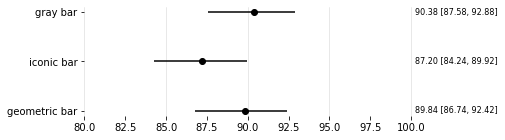

In [439]:
correct_rate_bar_list = create_data_list_for_plotCIs (df_correct_rate, 
                                  'correct_rate', 
                                  'bar_geo', 
                                  'bar_icon', 
                                  'bar_color',
                                  'geometric bar', 
                                  'iconic bar', 
                                  'gray bar')
plotCIs(correct_rate_bar_list,80, 100, 6, 2, "generated_plots/correct_rate_bar_CIs", 5)

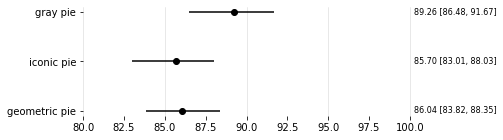

In [440]:
correct_rate_pie_list = create_data_list_for_plotCIs (df_correct_rate, 
                                  'correct_rate', 
                                  'pie_geo', 
                                  'pie_icon', 
                                  'pie_color',
                                  'geometric pie', 
                                  'iconic pie', 
                                  'gray pie')
plotCIs(correct_rate_pie_list, 80, 100, 6, 2, "generated_plots/correct_rate_pie_CIs", 5)

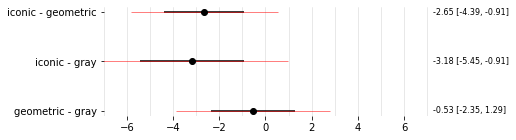

In [441]:
plotComparisonCIs (df_correct_rate, 
                   'correct_rate', 
                   'bar_color', 
                   'bar_geo', 
                   'bar_icon', 
                   'geometric - gray', 
                   'iconic - gray', 
                   'iconic - geometric', 
                   -7, 
                   7, 
                   6, 
                   2, 
                   "generated_plots/correct_rate_compare_bar_CIs",
                   2)

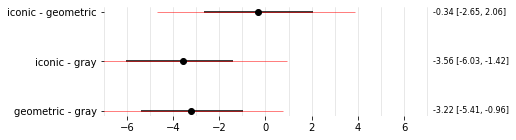

In [442]:
plotComparisonCIs (df_correct_rate, 
                   'correct_rate', 
                   'pie_color', 
                   'pie_geo', 
                   'pie_icon', 
                   'geometric - gray', 
                   'iconic - gray', 
                   'iconic - geometric', 
                   -7, 
                   7, 
                   6, 
                   2, 
                   "generated_plots/correct_rate_compare_pie_CIs",
                   2)

### Time Out
analysis the distribution of time out trials

In [443]:
# Generate the subset DataFrame of time out real trials
df_timeout_pre = combined_df[(combined_df['trial_type'] == 'real') & (combined_df['answer_accuracy'] == -1)]
df_timeout_pre.to_csv('generated_csv/timeout.csv', index=False)
df_timeout_pre = df_timeout_pre.reset_index(drop=True)

In [444]:
df_timeout = pd.read_csv('generated_csv/timeout_fixed.csv')

In [445]:
# # Fix df_timeout_pre
# key_index = df_timeout_pre.columns.get_loc('key_pressed')

# # Loop through all rows of the DataFrame
# for i, row in df_timeout_pre.iterrows():
#     # Check if the value in the key_pressed column is not "none"
#     if row["key_pressed"] != 'none':
#         print(i)
#         # Move the values one column left
#         df_timeout_pre.loc[i, key_index:-1] = df_timeout_pre.loc[i, key_index+1:].values
#         # Fill the last column with "none"
#         df_timeout_pre.iloc[i, key_index] = 'none'
# df_timeout_pre
# df_timeout_pre.to_csv('generated_csv/timeout_fixed.csv', index=False)

In [446]:
df_timeout['condition'].value_counts()

pie    79
bar    46
Name: condition, dtype: int64

In [447]:
df_timeout['texture_condition'].value_counts()

icon     57
geo      35
color    33
Name: texture_condition, dtype: int64

In [448]:
print("number of time-out trials in...")
print("each chart type:")
print(df_timeout['condition'].value_counts())
print()

print("each texture type:")
print(df_timeout['texture_condition'].value_counts())
print()


print("each condition")
filtered_df = df_timeout[(df_timeout['condition'] == 'bar') & (df_timeout['texture_condition'] == 'geo')]
num_rows = filtered_df.shape[0]
print("geometric bar:" + str(num_rows))
                                                               
filtered_df = df_timeout[(df_timeout['condition'] == 'bar') & (df_timeout['texture_condition'] == 'icon')]
num_rows = filtered_df.shape[0]
print("iconic bar:" + str(num_rows))
                                                               
filtered_df = df_timeout[(df_timeout['condition'] == 'bar') & (df_timeout['texture_condition'] == 'color')]
num_rows = filtered_df.shape[0]
print("gray bar:" + str(num_rows))

print()
filtered_df = df_timeout[(df_timeout['condition'] == 'pie') & (df_timeout['texture_condition'] == 'geo')]
num_rows = filtered_df.shape[0]
print("geometric pie:" + str(num_rows))
                                                               
filtered_df = df_timeout[(df_timeout['condition'] == 'pie') & (df_timeout['texture_condition'] == 'icon')]
num_rows = filtered_df.shape[0]
print("iconic pie:" + str(num_rows))
                                                               
filtered_df = df_timeout[(df_timeout['condition'] == 'pie') & (df_timeout['texture_condition'] == 'color')]
num_rows = filtered_df.shape[0]
print("gray pie:" + str(num_rows))

number of time-out trials in...
each chart type:
pie    79
bar    46
Name: condition, dtype: int64

each texture type:
icon     57
geo      35
color    33
Name: texture_condition, dtype: int64

each condition
geometric bar:12
iconic bar:26
gray bar:8

geometric pie:23
iconic pie:31
gray pie:25


### Response time
We only count response time for correct and incorrect trials. We dropped out time-out trials.

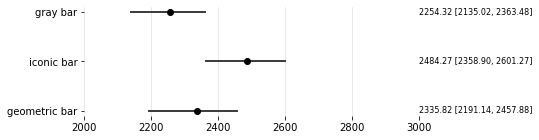

In [449]:
#先求了每个参与者的平均值之后的response time
response_time_bar_list = create_data_list_for_plotCIs (df_response_time, 
                                  'response_time', 
                                  'bar_geo', 
                                  'bar_icon', 
                                  'bar_color',
                                  'geometric bar', 
                                  'iconic bar', 
                                  'gray bar')
plotCIs(response_time_bar_list,2000, 3000, 6, 2, "generated_plots/response_time_bar_CIs", 200)

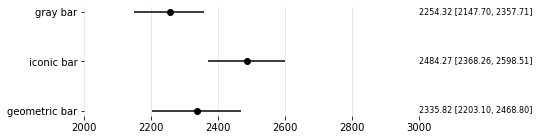

In [450]:
#先求了每个参与者的平均值之后的response time
response_time_pie_list = create_data_list_for_plotCIs (df_response_time, 
                                  'response_time', 
                                  'pie_geo', 
                                  'pie_icon', 
                                  'pie_color',
                                  'geometric pie', 
                                  'iconic pie', 
                                  'gray pie')
plotCIs(response_time_bar_list,2000, 3000, 6, 2, "generated_plots/response_time_pie_CIs", 200)

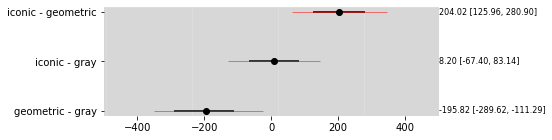

In [451]:
plotComparisonCIs (df_response_time, 
                   'response_time', 
                   'pie_color', 
                   'pie_geo', 
                   'pie_icon', 
                   'geometric - gray', 
                   'iconic - gray', 
                   'iconic - geometric', 
                   -500, 
                   500, 
                   6, 
                   2, 
                   "generated_plots/response_time_compare_pie_CIs",
                   200)

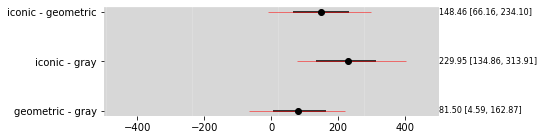

In [452]:
plotComparisonCIs (df_response_time, 
                   'response_time', 
                   'bar_color', 
                   'bar_geo', 
                   'bar_icon', 
                   'geometric - gray', 
                   'iconic - gray', 
                   'iconic - geometric', 
                   -500, 
                   500, 
                   6, 
                   2, 
                   "response_time_compare_bar_CIs",200)

### Response time - all trials